___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Text Classification Assessment
This assessment is very much like the Text Classification Project we just completed, and the dataset is very similar.

The **moviereviews2.tsv** dataset contains the text of 6000 movie reviews. 3000 are positive, 3000 are negative, and the text has been preprocessed as a tab-delimited file. As before, labels are given as `pos` and `neg`.

We've included 20 reviews that contain either `NaN` data, or have strings made up of whitespace.

For more information on this dataset visit http://ai.stanford.edu/~amaas/data/sentiment/

### Task #1: Perform imports and load the dataset into a pandas DataFrame
For this exercise you can load the dataset from `'../TextFiles/moviereviews2.tsv'`.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('./moviereviews2.tsv', sep='\t')
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


### Task #2: Check for missing values:

In [2]:
# Check for NaN values:
df.isnull().sum()

label      0
review    20
dtype: int64

In [3]:
# Check for whitespace strings (it's OK if there aren't any!):
blanks = []

for idx, label, review in df.itertuples():
    if type(review) == str:          # avoid NaN values
        if review.isspace():         # test 'review' for whitespace
            blanks.append(idx) 




blanks

[]

### Task #3: Remove NaN values:

In [4]:
df.dropna(inplace=True)

### Task #4: Take a quick look at the `label` column:

In [5]:
df['label'].value_counts()

label
pos    2990
neg    2990
Name: count, dtype: int64

In [6]:
X = df.drop('label',axis=1)
y = df['label']
X = np.reshape(X,y.shape)

### Task #5: Split the data into train & test sets:
You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.33, random_state=42`

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Task #6: Build a pipeline to vectorize the date, then train and fit a model
You may use whatever model you like. To compare your results to the solution notebook, use `LinearSVC`.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

text_clf_svc = Pipeline([('tfidf', TfidfVectorizer()),('clf',LinearSVC(dual='auto'))])

text_clf_svc.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC(dual='auto'))])

### Task #7: Run predictions and analyze the results

In [9]:
# Form a prediction set
preds = text_clf_svc.predict(X_test)

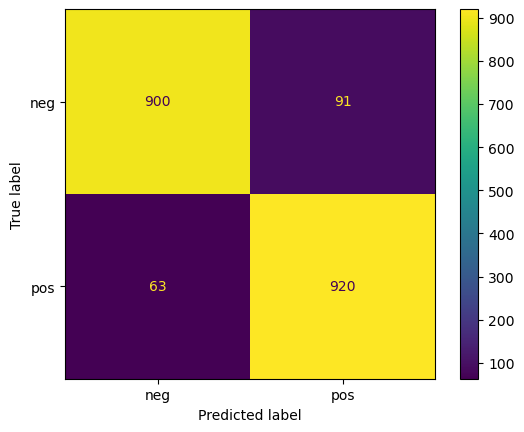

In [10]:
# Report the confusion matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

ConfusionMatrixDisplay.from_predictions(y_test, preds)

In [11]:
# Print a classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         neg       0.93      0.91      0.92       991
         pos       0.91      0.94      0.92       983

    accuracy                           0.92      1974
   macro avg       0.92      0.92      0.92      1974
weighted avg       0.92      0.92      0.92      1974



In [12]:
# Print the overall accuracy
print(accuracy_score(y_test,preds))

0.9219858156028369


## Great job!